In [1]:
import pandas as pd
# Read transaction
df_trans = pd.read_csv("../HnM/transactions_train.csv", parse_dates=["t_dat"], dtype={"article_id":str})
df_meta = pd.read_csv("../HnM/articles.csv", dtype={"article_id":str})
df_raw = pd.merge(df_trans, df_meta, on="article_id")

In [11]:
def preprocess(data):
    data = data.copy()

    # Make sales
    data = data.groupby(["t_dat", "article_id"], as_index=False).agg(sales=("customer_id", "count"))
    data["idx"] = data.groupby("article_id").cumcount()

    # Pivot
    pd_ref = pd.pivot(data=data, index="idx", columns="article_id", values="sales")
    pd_ref = pd_ref.fillna(0)
    
    # Data to list
    data = pd_ref.reset_index().melt(id_vars="idx")
    data = data.groupby("article_id", as_index=False)[["value", "idx"]].agg(list)
    return data, pd_ref


df_prep = df_raw[df_raw["index_name"]=="Ladieswear"].reset_index(drop=True)
df_prep, pd_ref = preprocess(df_trans)

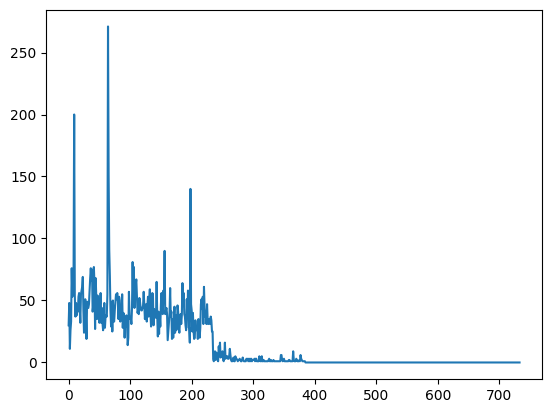

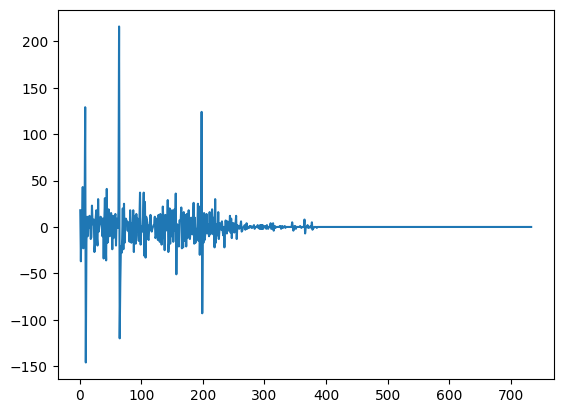

In [31]:
import matplotlib.pyplot as plt

temp = df_prep.iloc[0]["value"]
temp = pd.DataFrame(temp, columns=["val"])

temp["shift1"] = temp["val"].shift(1)
temp["shift2"] = temp["val"].shift(2)

temp["diff1"] = temp["val"] - temp["shift1"]
temp["diff2"] = temp["diff1"] - temp["shift2"]

plt.plot(temp["val"])
plt.show()

plt.plot(temp["diff1"])
plt.show()

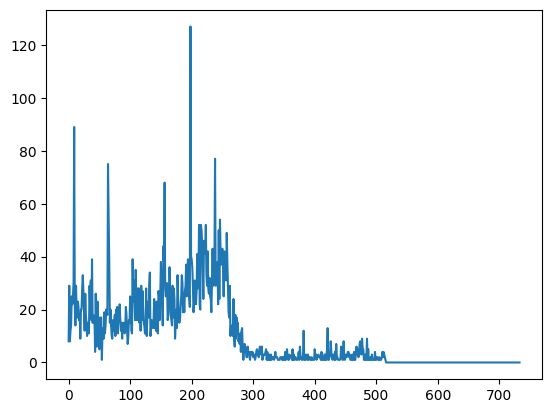

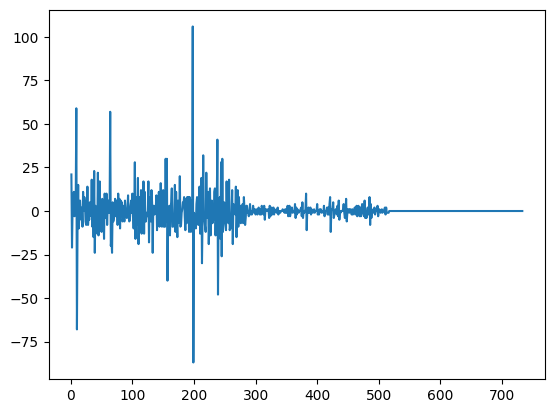

In [33]:
import matplotlib.pyplot as plt

temp = df_prep.iloc[1]["value"]
temp = pd.DataFrame(temp, columns=["val"])

temp["shift1"] = temp["val"].shift(1)
temp["shift2"] = temp["val"].shift(2)

temp["diff1"] = temp["val"] - temp["shift1"]
temp["diff2"] = temp["diff1"] - temp["shift2"]

plt.plot(temp["val"])
plt.show()

plt.plot(temp["diff1"])
plt.show()

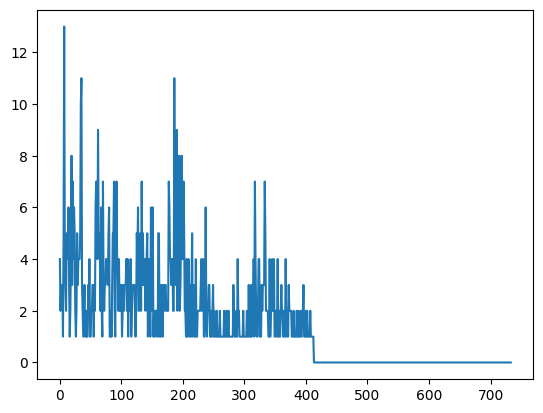

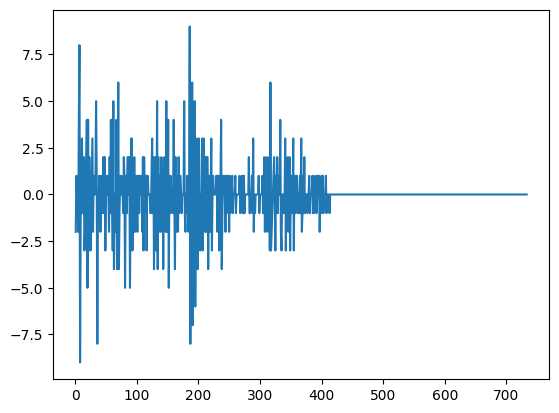

In [43]:
import matplotlib.pyplot as plt

temp = df_prep.iloc[30]["value"]
temp = pd.DataFrame(temp, columns=["val"])

temp["shift1"] = temp["val"].shift(1)
temp["shift2"] = temp["val"].shift(2)

temp["diff1"] = temp["val"] - temp["shift1"]
temp["diff2"] = temp["diff1"] - temp["shift2"]

plt.plot(temp["val"])
plt.show()

plt.plot(temp["diff1"])
plt.show()

In [13]:
[i for i in itertools.product([0, 1], repeat=3)]

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [86]:
from torch.distributions import Dirichlet

Dirichlet(alphas_tensor).sample() * 100

tensor([[7.3833e+01, 2.6167e+01, 1.1755e-36],
        [5.9925e+01, 1.1755e-36, 4.0075e+01],
        [3.1508e+01, 8.9097e+00, 5.9582e+01],
        [5.7260e+01, 4.2740e+01, 1.1755e-36],
        [7.4228e+01, 1.1755e-36, 2.5772e+01],
        [4.8371e+01, 1.1755e-36, 5.1629e+01],
        [1.1760e+01, 6.4054e+01, 2.4186e+01],
        [1.0000e+02, 1.1755e-36, 1.1755e-36],
        [1.7793e+01, 6.7175e+01, 1.5032e+01],
        [6.7423e+01, 3.2577e+01, 1.1755e-36],
        [6.0909e+01, 1.1755e-36, 3.9091e+01],
        [1.3029e+01, 5.8186e+01, 2.8785e+01],
        [1.1755e-36, 1.0000e+02, 1.1755e-36],
        [1.1755e-36, 1.0000e+02, 1.1755e-36],
        [3.9606e+01, 1.1755e-36, 6.0394e+01],
        [1.1755e-36, 1.0000e+02, 1.1755e-36],
        [2.7418e+01, 7.2582e+01, 1.1755e-36],
        [6.3042e+01, 3.6958e+01, 1.1755e-36],
        [6.3586e+01, 2.2218e+01, 1.4196e+01],
        [1.1755e-36, 1.0000e+02, 1.1755e-36],
        [6.0785e+01, 2.5983e+01, 1.3232e+01],
        [1.0891e+01, 8.9109e+01, 1

In [82]:
import itertools
import torch

n_tasks = 3
B = 64
alphas = 1
eps = 1e-5

valid_task_choices = torch.Tensor([list(i) for i in itertools.product([0, 1], repeat=n_tasks)][1:])
# print("valid_task_choices:\n", valid_task_choices); print("_"*100)
rand_per_sample_choice = torch.randint(0, len(valid_task_choices), (B,)) # 0 ~ 가능한 경우의 수만큼 batch개를 뽑아라
# print("rand_per_sample_choice:\n", rand_per_sample_choice); print("_"*100)
alphas_tensor = torch.index_select(valid_task_choices, dim=0, index=rand_per_sample_choice) # valid_task_choices에서 랜덤으로 batch개만큼 가져와라
print("alphas_tensor:\n", alphas_tensor[:10]); print("_"*100)
alphas_tensor = alphas_tensor * torch.tensor(alphas) + eps
alphas_tensor[:10]

alphas_tensor:
 tensor([[1., 1., 0.],
        [1., 0., 1.],
        [1., 1., 1.],
        [1., 1., 0.],
        [1., 0., 1.],
        [1., 0., 1.],
        [1., 1., 1.],
        [1., 0., 0.],
        [1., 1., 1.],
        [1., 1., 0.]])
____________________________________________________________________________________________________


tensor([[1.0000e+00, 1.0000e+00, 1.0000e-05],
        [1.0000e+00, 1.0000e-05, 1.0000e+00],
        [1.0000e+00, 1.0000e+00, 1.0000e+00],
        [1.0000e+00, 1.0000e+00, 1.0000e-05],
        [1.0000e+00, 1.0000e-05, 1.0000e+00],
        [1.0000e+00, 1.0000e-05, 1.0000e+00],
        [1.0000e+00, 1.0000e+00, 1.0000e+00],
        [1.0000e+00, 1.0000e-05, 1.0000e-05],
        [1.0000e+00, 1.0000e+00, 1.0000e+00],
        [1.0000e+00, 1.0000e+00, 1.0000e-05]])